In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV, cross_val_score

In [3]:
df=pd.read_csv('diabetes.csv')

In [61]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:>

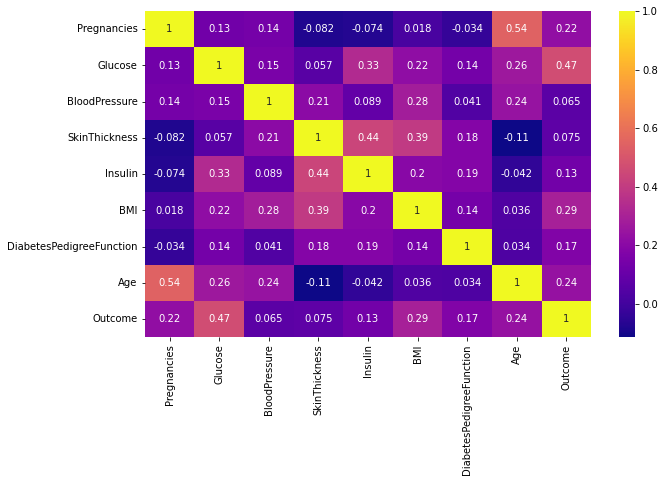

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

In [62]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

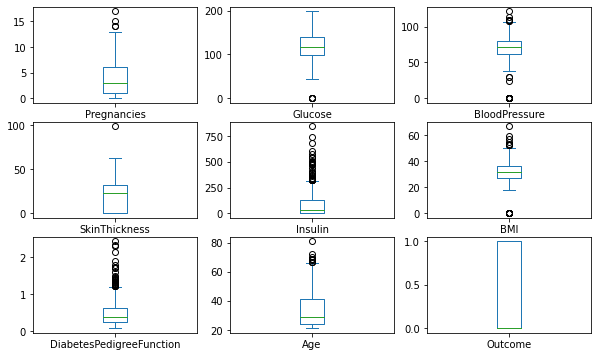

In [31]:
df.plot(kind='box',subplots=True,figsize=(10,6),layout=(3,3))

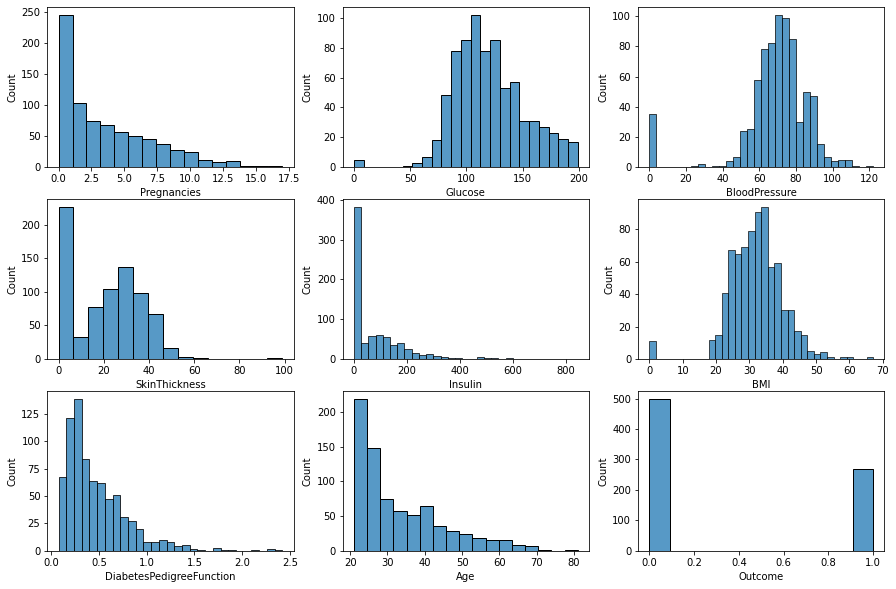

In [66]:
fig,axs=plt.subplots(nrows=3,ncols=3,figsize=(15,10))
ax_list=[cols for rows in axs for cols in rows]
for i,col in enumerate(df.columns):
    sns.histplot(df[col],ax=ax_list[i])

Glucose,BP,Skin thickness,Insulin,BMI cant be 0
Lets correct 0 values

In [73]:
missing_col=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [74]:
# replace col with null and fill with mean
for col in missing_col:
    df[col]=df[col].replace(0,np.nan)
    df[col]=df[col].fillna(df[col].mean())

In [75]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

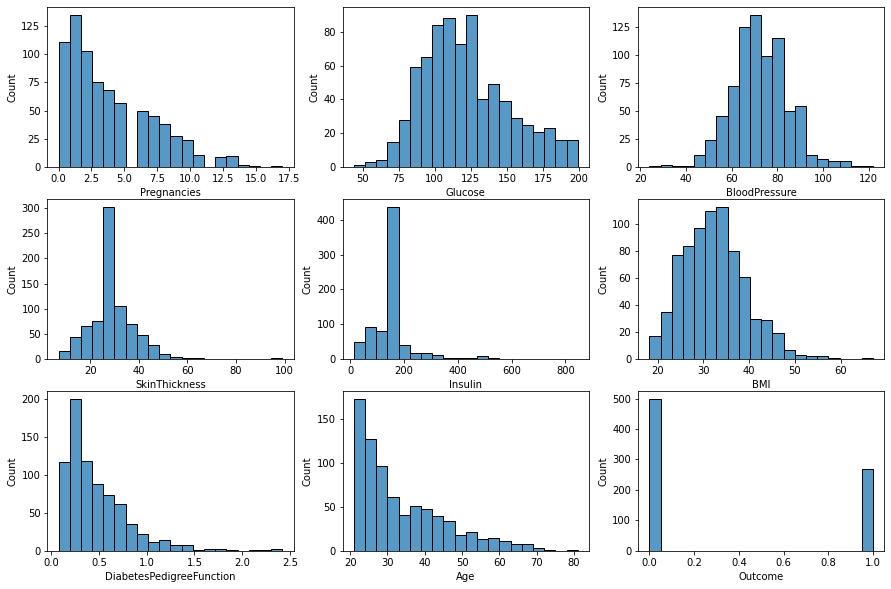

In [87]:
fig,axs=plt.subplots(nrows=3,ncols=3,figsize=(15,10))
ax_list=[cols for rows in axs for cols in rows]
for i,col in enumerate(df.columns):
    sns.histplot(df[col],ax=ax_list[i],bins=20)

In [77]:
X=df.drop(columns='Outcome',axis=1)
y=df['Outcome']

In [78]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [79]:
X=scaler.fit_transform(X)

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

Before col fill with mean

In [46]:
lm1=LogisticRegression()
lm1.fit(X_train,y_train)
y_pred1=lm1.predict(X_test)
print('Accuracy Score:\n',accuracy_score(y_test,y_pred1))
print('Model 1 confusion matrix: \n',confusion_matrix(y_test,y_pred1))
print('Classification Report:\n',classification_report(y_test,y_pred1))

Accuracy Score:
 0.7532467532467533
Model 1 confusion matrix: 
 [[79 20]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



after col fill with mean

In [83]:
lm1=LogisticRegression()
lm1.fit(X_train,y_train)
y_pred1=lm1.predict(X_test)
print('Accuracy Score:\n',accuracy_score(y_test,y_pred1))
print('Model 1 confusion matrix: \n',confusion_matrix(y_test,y_pred1))
print('Classification Report:\n',classification_report(y_test,y_pred1))

Accuracy Score:
 0.7532467532467533
Model 1 confusion matrix: 
 [[82 17]
 [21 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [84]:
lm2=LogisticRegression(max_iter=500)
lm2.fit(X_train,y_train)
y_pred2=lm2.predict(X_test)
print('Accuracy Score:\n',accuracy_score(y_test,y_pred2))
print('Model 1 confusion matrix: \n',confusion_matrix(y_test,y_pred2))
print('Classification Report:\n',classification_report(y_test,y_pred2))

Accuracy Score:
 0.7532467532467533
Model 1 confusion matrix: 
 [[82 17]
 [21 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [95]:
lm2=LogisticRegression(penalty='l2',solver="liblinear")
lm2.fit(X_train,y_train)
y_pred2=lm2.predict(X_test)
print('Accuracy Score:\n',accuracy_score(y_test,y_pred2))
print('Model 1 confusion matrix: \n',confusion_matrix(y_test,y_pred2))
print('Classification Report:\n',classification_report(y_test,y_pred2))

Accuracy Score:
 0.7532467532467533
Model 1 confusion matrix: 
 [[82 17]
 [21 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [111]:

lm3=LogisticRegression()


parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]



grid_search = GridSearchCV(estimator = lm3,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_search.fit(X_train,y_train)

y_pred2=grid_search.predict(X_test)

print('Accuracy Score:\n',accuracy_score(y_test,y_pred2))
print('Model 1 confusion matrix: \n',confusion_matrix(y_test,y_pred2))
print('Classification Report:\n',classification_report(y_test,y_pred2))
print('-'*20)
print(grid_search.best_params_)
print(grid_search.best_score_)

Accuracy Score:
 0.7662337662337663
Model 1 confusion matrix: 
 [[84 15]
 [21 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82        99
           1       0.69      0.62      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154

--------------------
{'C': 0.1}
0.7671331467413035


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Py

In [118]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train,y_train)
y_pred3=knn.predict(X_test)
print('Accuracy Score:\n',accuracy_score(y_test,y_pred3))
print('Model 1 confusion matrix: \n',confusion_matrix(y_test,y_pred3))
print('Classification Report:\n',classification_report(y_test,y_pred3))

Accuracy Score:
 0.7792207792207793
Model 1 confusion matrix: 
 [[87 12]
 [22 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        99
           1       0.73      0.60      0.66        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [120]:
#after fill with mean values
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(1,50)}
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)
y_pred3=knn_cv.predict(X_test)
y_pred3
knn_cv.best_params_
#print('Accuracy Score:\n',accuracy_score(y_test,y_pred3))
#print('Model 1 confusion matrix: \n',confusion_matrix(y_test,y_pred3))
#print('Classification Report:\n',classification_report(y_test,y_pred3))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will 

{'n_neighbors': 27}

In [124]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=27)

knn.fit(X_train,y_train)
y_pred3=knn.predict(X_test)
print('Accuracy Score:\n',accuracy_score(y_test,y_pred3))
print('Model 1 confusion matrix: \n',confusion_matrix(y_test,y_pred3))
print('Classification Report:\n',classification_report(y_test,y_pred3))

acc = accuracy_score(y_test,y_pred3)
f1 = f1_score(y_test,y_pred3)
print("Accuracy: {:.2f}%".format(acc * 100))
print("F1 score: {:.2f}".format(f1))

Accuracy Score:
 0.7272727272727273
Model 1 confusion matrix: 
 [[85 14]
 [28 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80        99
           1       0.66      0.49      0.56        55

    accuracy                           0.73       154
   macro avg       0.71      0.67      0.68       154
weighted avg       0.72      0.73      0.72       154

Accuracy: 72.73%
F1 score: 0.56


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Load the dataset into a Pandas DataFrame
df = pd.read_csv('diabetes.csv')

# Split the data into features (X) and target (y)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters to tune
param_grid = {
    "C": [0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"]
}

# Train a logistic regression model using Grid Search
model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="f1")
grid_search.fit(X_train, y_train)

# Make predictions on the test data
y_pred = grid_search.predict(X_test)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model's accuracy and F1 score
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))
print("F1 score: {:.2f}".format(f1))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

Best hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 75.97%
F1 score: 0.67
Confusion matrix:
 [[80 19]
 [18 37]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma